In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r pakistan_2020

In [5]:
pakistan_2020

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
5,5,Abid Ali (PAK),2,2,0,43,22,21.50,54,79.62,...,-,-,-,-,-,-,-,-,0,0
22,22,Babar Azam (PAK),3,3,1,221,125,110.50,217,101.84,...,-,-,-,-,-,-,-,-,0,0
67,67,Faheem Ashraf (PAK),2,1,0,23,23,23.00,16,143.75,...,87,1,1/30,87.00,5.11,102.0,0,0,0,0
68,68,Fakhar Zaman (PAK),1,1,0,2,2,2.00,2,100.00,...,-,-,-,-,-,-,-,-,0,0
80,80,Haider Ali (PAK),2,2,0,42,29,21.00,33,127.27,...,-,-,-,-,-,-,-,-,1,0
81,81,Haris Rauf (PAK),2,-,-,-,-,-,-,-,...,88,1,1/31,88.00,5.17,102.0,0,0,1,0
82,82,Haris Sohail (PAK),1,1,0,71,71,71.00,82,86.58,...,-,-,-,-,-,-,-,-,0,0
92,92,Iftikhar Ahmed (PAK),3,3,1,46,18,23.00,59,77.96,...,100,5,5/40,20.00,5.00,24.0,0,1,2,0
93,93,Imad Wasim (PAK),2,1,1,34,34*,-,26,130.76,...,92,2,1/43,46.00,6.13,45.0,0,0,0,0
94,94,Imam-ul-Haq (PAK),3,3,0,111,58,37.00,139,79.85,...,-,-,-,-,-,-,-,-,1,0


In [6]:
pakistan_2020=pakistan_2020.reset_index()

In [7]:
pakistan_2020

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,5,5,Abid Ali (PAK),2,2,0,43,22,21.50,54,...,-,-,-,-,-,-,-,-,0,0
1,22,22,Babar Azam (PAK),3,3,1,221,125,110.50,217,...,-,-,-,-,-,-,-,-,0,0
2,67,67,Faheem Ashraf (PAK),2,1,0,23,23,23.00,16,...,87,1,1/30,87.00,5.11,102.0,0,0,0,0
3,68,68,Fakhar Zaman (PAK),1,1,0,2,2,2.00,2,...,-,-,-,-,-,-,-,-,0,0
4,80,80,Haider Ali (PAK),2,2,0,42,29,21.00,33,...,-,-,-,-,-,-,-,-,1,0
5,81,81,Haris Rauf (PAK),2,-,-,-,-,-,-,...,88,1,1/31,88.00,5.17,102.0,0,0,1,0
6,82,82,Haris Sohail (PAK),1,1,0,71,71,71.00,82,...,-,-,-,-,-,-,-,-,0,0
7,92,92,Iftikhar Ahmed (PAK),3,3,1,46,18,23.00,59,...,100,5,5/40,20.00,5.00,24.0,0,1,2,0
8,93,93,Imad Wasim (PAK),2,1,1,34,34*,-,26,...,92,2,1/43,46.00,6.13,45.0,0,0,0,0
9,94,94,Imam-ul-Haq (PAK),3,3,0,111,58,37.00,139,...,-,-,-,-,-,-,-,-,1,0


In [8]:
pakistan_2020.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
pakistan_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,Abid Ali (PAK),2,2,0,43,22,21.50,54,79.62,0,...,-,-,-,-,-,-,-,-,0,0
1,Babar Azam (PAK),3,3,1,221,125,110.50,217,101.84,1,...,-,-,-,-,-,-,-,-,0,0
2,Faheem Ashraf (PAK),2,1,0,23,23,23.00,16,143.75,0,...,87,1,1/30,87.00,5.11,102.0,0,0,0,0
3,Fakhar Zaman (PAK),1,1,0,2,2,2.00,2,100.00,0,...,-,-,-,-,-,-,-,-,0,0
4,Haider Ali (PAK),2,2,0,42,29,21.00,33,127.27,0,...,-,-,-,-,-,-,-,-,1,0
5,Haris Rauf (PAK),2,-,-,-,-,-,-,-,-,...,88,1,1/31,88.00,5.17,102.0,0,0,1,0
6,Haris Sohail (PAK),1,1,0,71,71,71.00,82,86.58,0,...,-,-,-,-,-,-,-,-,0,0
7,Iftikhar Ahmed (PAK),3,3,1,46,18,23.00,59,77.96,0,...,100,5,5/40,20.00,5.00,24.0,0,1,2,0
8,Imad Wasim (PAK),2,1,1,34,34*,-,26,130.76,0,...,92,2,1/43,46.00,6.13,45.0,0,0,0,0
9,Imam-ul-Haq (PAK),3,3,0,111,58,37.00,139,79.85,0,...,-,-,-,-,-,-,-,-,1,0


In [10]:
pakistan_2020_players =pakistan_2020.copy()

In [11]:
pakistan_2020_players.drop('Player',axis=1,inplace=True)

In [12]:
pakistan_2020_players.HS=pakistan_2020_players.HS.str.extract('(\d+)')
pakistan_2020_players['HS'].fillna(value=0, inplace=True)


In [13]:
pakistan_2020_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,2,2,0,43,22,21.50,54,79.62,0,0,...,-,-,-,-,-,-,-,-,0,0
1,3,3,1,221,125,110.50,217,101.84,1,1,...,-,-,-,-,-,-,-,-,0,0
2,2,1,0,23,23,23.00,16,143.75,0,0,...,87,1,1/30,87.00,5.11,102.0,0,0,0,0
3,1,1,0,2,2,2.00,2,100.00,0,0,...,-,-,-,-,-,-,-,-,0,0
4,2,2,0,42,29,21.00,33,127.27,0,0,...,-,-,-,-,-,-,-,-,1,0
5,2,-,-,-,0,-,-,-,-,-,...,88,1,1/31,88.00,5.17,102.0,0,0,1,0
6,1,1,0,71,71,71.00,82,86.58,0,1,...,-,-,-,-,-,-,-,-,0,0
7,3,3,1,46,18,23.00,59,77.96,0,0,...,100,5,5/40,20.00,5.00,24.0,0,1,2,0
8,2,1,1,34,34,-,26,130.76,0,0,...,92,2,1/43,46.00,6.13,45.0,0,0,0,0
9,3,3,0,111,58,37.00,139,79.85,0,1,...,-,-,-,-,-,-,-,-,1,0


In [14]:
pakistan_2020_players.replace("-",0,inplace=True)

In [15]:
pakistan_2020_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

pakistan_2020_players_scaled = pd.DataFrame(scaler.fit_transform(pakistan_2020_players),columns=pakistan_2020_players.columns)
pakistan_2020_players_scaled.shape
pakistan_2020_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.083624,0.340997,-0.774597,-0.052715,-0.296126,-0.100731,0.055896,-0.370158,-0.258199,-0.577350,...,-0.699913,-0.920493,-0.789694,-0.721883,-0.956003,-0.730468,-0.258199,-0.480384,-0.921546,0.0
1,1.254363,1.432188,1.290994,3.283564,2.979142,2.995326,2.971445,-0.005508,3.872983,1.732051,...,-0.699913,-0.920493,-0.789694,-0.721883,-0.956003,-0.730468,-0.258199,-0.480384,-0.921546,0.0
2,-0.083624,-0.750194,-0.774597,-0.427578,-0.264327,-0.048550,-0.623802,0.682273,-0.258199,-0.577350,...,1.336198,0.841991,-0.303728,2.205180,1.004930,2.302153,-0.258199,-0.480384,-0.921546,0.0
3,-1.421611,-0.750194,-0.774597,-0.821184,-0.932100,-0.779080,-0.874217,-0.035704,-0.258199,-0.577350,...,-0.699913,-0.920493,-0.789694,-0.721883,-0.956003,-0.730468,-0.258199,-0.480384,-0.921546,0.0
4,-0.083624,0.340997,-0.774597,-0.071458,-0.073535,-0.118124,-0.319727,0.411822,-0.258199,-0.577350,...,-0.699913,-0.920493,-0.789694,-0.721883,-0.956003,-0.730468,-0.258199,-0.480384,0.212664,0.0


In [17]:
pakistan_2020_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.600000e+01,16.000000,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,16.0
mean,2.949030e-17,-3.469447e-17,-6.938894e-17,2.081668e-17,7.632783e-17,2.428613e-17,6.938894e-18,-7.806256e-18,8.326673e-17,-4.163336e-17,...,7.632783e-17,0.000000,2.775558e-17,6.852158e-17,4.163336e-17,-4.315125e-17,8.326673e-17,-4.857226e-17,-6.938894e-17,0.0
std,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,...,1.032796e+00,1.032796,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,0.0
min,-1.421611e+00,-1.841385e+00,-7.745967e-01,-8.586700e-01,-9.956973e-01,-8.486544e-01,-9.099909e-01,-1.676795e+00,-2.581989e-01,-5.773503e-01,...,-6.999132e-01,-0.920493,-7.896938e-01,-7.218825e-01,-9.560031e-01,-7.304676e-01,-2.581989e-01,-4.803845e-01,-9.215456e-01,0.0
25%,-4.181210e-01,-7.501938e-01,-7.745967e-01,-6.759244e-01,-7.174585e-01,-7.964736e-01,-7.624248e-01,-3.769689e-01,-2.581989e-01,-5.773503e-01,...,-6.999132e-01,-0.920493,-7.896938e-01,-7.218825e-01,-9.560031e-01,-7.304676e-01,-2.581989e-01,-4.803845e-01,-9.215456e-01,0.0
50%,-8.362420e-02,-2.045983e-01,-7.745967e-01,-2.307749e-01,-2.802262e-01,-1.094273e-01,-1.855755e-01,-6.220761e-02,-2.581989e-01,-5.773503e-01,...,-6.999132e-01,-0.657133,-5.467111e-01,-6.344071e-01,-4.571354e-01,-5.520782e-01,-2.581989e-01,-4.803845e-01,2.126644e-01,0.0
75%,1.254363e+00,6.137949e-01,1.290994e+00,6.911532e-02,2.285533e-01,2.210506e-01,1.721604e-01,9.882446e-02,-2.581989e-01,0.000000e+00,...,5.726563e-01,0.983800,5.467111e-01,3.059537e-01,1.010687e+00,4.067651e-01,-2.581989e-01,-4.803845e-01,2.126644e-01,0.0
max,1.254363e+00,1.432188e+00,1.290994e+00,3.283564e+00,2.979142e+00,2.995326e+00,2.971445e+00,3.246478e+00,3.872983e+00,1.732051e+00,...,2.354254e+00,1.652329,1.640133e+00,2.238824e+00,1.438562e+00,2.302153e+00,3.872983e+00,2.081666e+00,2.481084e+00,0.0


In [18]:
X =  pakistan_2020_players_scaled.iloc[:,:].values

In [19]:
X

array([[-8.36242010e-02,  3.40997170e-01, -7.74596669e-01,
        -5.27150777e-02, -2.96125535e-01, -1.00730552e-01,
         5.58962498e-02, -3.70158360e-01, -2.58198890e-01,
        -5.77350269e-01,  0.00000000e+00,  7.76035104e-01,
        -7.18901643e-01, -1.70477020e+00, -8.36242010e-02,
        -9.42809042e-01, -9.22482776e-01, -6.99913239e-01,
        -9.20492869e-01, -7.89693761e-01, -7.21882527e-01,
        -9.56003077e-01, -7.30467593e-01, -2.58198890e-01,
        -4.80384461e-01, -9.21545567e-01,  0.00000000e+00],
       [ 1.25436302e+00,  1.43218811e+00,  1.29099445e+00,
         3.28356362e+00,  2.97914213e+00,  2.99532612e+00,
         2.97144464e+00, -5.50791209e-03,  3.87298335e+00,
         1.73205081e+00,  0.00000000e+00,  3.19036654e+00,
         1.93550442e+00, -1.41423292e+00,  1.25436302e+00,
        -9.42809042e-01, -9.22482776e-01, -6.99913239e-01,
        -9.20492869e-01, -7.89693761e-01, -7.21882527e-01,
        -9.56003077e-01, -7.30467593e-01, -2.58198890e-

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(pakistan_2020_players_scaled))

False

In [23]:
pakistan_2020_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.083624,0.340997,-0.774597,-0.052715,-0.296126,-0.100731,0.055896,-0.370158,-0.258199,-0.577350,...,-0.699913,-0.920493,-0.789694,-0.721883,-0.956003,-0.730468,-0.258199,-0.480384,-0.921546,0.0
1,1.254363,1.432188,1.290994,3.283564,2.979142,2.995326,2.971445,-0.005508,3.872983,1.732051,...,-0.699913,-0.920493,-0.789694,-0.721883,-0.956003,-0.730468,-0.258199,-0.480384,-0.921546,0.0
2,-0.083624,-0.750194,-0.774597,-0.427578,-0.264327,-0.048550,-0.623802,0.682273,-0.258199,-0.577350,...,1.336198,0.841991,-0.303728,2.205180,1.004930,2.302153,-0.258199,-0.480384,-0.921546,0.0
3,-1.421611,-0.750194,-0.774597,-0.821184,-0.932100,-0.779080,-0.874217,-0.035704,-0.258199,-0.577350,...,-0.699913,-0.920493,-0.789694,-0.721883,-0.956003,-0.730468,-0.258199,-0.480384,-0.921546,0.0
4,-0.083624,0.340997,-0.774597,-0.071458,-0.073535,-0.118124,-0.319727,0.411822,-0.258199,-0.577350,...,-0.699913,-0.920493,-0.789694,-0.721883,-0.956003,-0.730468,-0.258199,-0.480384,0.212664,0.0
5,-0.083624,-1.841385,-0.774597,-0.858670,-0.995697,-0.848654,-0.909991,-1.676795,-0.258199,-0.577350,...,0.318142,0.862250,-0.303728,2.238824,1.027955,2.302153,-0.258199,-0.480384,0.212664,0.0
6,-1.421611,-0.750194,-0.774597,0.472093,1.262012,1.621234,0.556727,-0.255938,-0.258199,1.732051,...,-0.699913,-0.920493,-0.789694,-0.721883,-0.956003,-0.730468,-0.258199,-0.480384,-0.921546,0.0
7,1.254363,1.432188,1.290994,0.003514,-0.423320,-0.048550,0.145330,-0.397400,-0.258199,-0.577350,...,1.336198,1.105351,1.640133,-0.048995,0.962719,-0.016910,-0.258199,2.081666,1.346874,0.0
8,-0.083624,-0.750194,1.290994,-0.221403,0.085459,-0.848654,-0.444934,0.469096,-0.258199,-0.577350,...,-0.699913,0.943284,0.182237,0.825760,1.396350,0.607453,-0.258199,-0.480384,-0.921546,0.0
9,1.254363,1.432188,-0.774597,1.221818,0.848628,0.438470,1.576274,-0.366384,-0.258199,1.732051,...,-0.699913,-0.920493,-0.789694,-0.721883,-0.956003,-0.730468,-0.258199,-0.480384,0.212664,0.0


In [24]:
np.all(np.isfinite(pakistan_2020_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


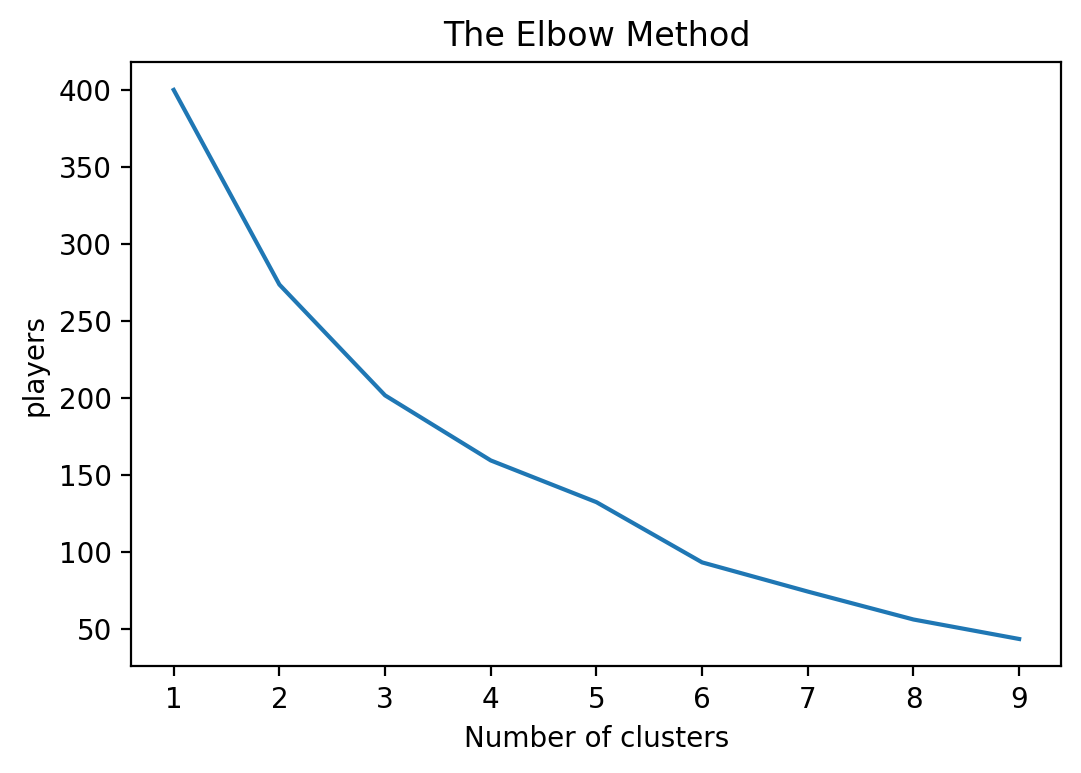

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [28]:
kmeans.cluster_centers_

array([[ 0.0836242 , -0.34099717,  0.51639778, -0.42523496, -0.41139588,
        -0.47469245, -0.5097738 ,  0.27044156, -0.25819889, -0.28867513,
         0.        , -0.47424367, -0.05530013,  0.49134981,  0.0836242 ,
         0.94280904,  0.92248278,  0.69991324,  0.92049287,  0.78969376,
         0.72188253,  0.95600308,  0.73046759,  0.25819889,  0.48038446,
         0.07088812,  0.        ],
       [-0.27476523,  0.18511275, -0.77459667,  0.01690229,  0.04457498,
         0.11460193,  0.15810654, -0.30828922, -0.25819889,  0.08247861,
         0.        ,  0.08622612, -0.21330049, -0.35950936, -0.27476523,
        -0.94280904, -0.92248278, -0.69991324, -0.92049287, -0.78969376,
        -0.72188253, -0.95600308, -0.73046759, -0.25819889, -0.48038446,
         0.05063437,  0.        ],
       [ 1.25436302,  1.43218811,  1.29099445,  3.28356362,  2.97914213,
         2.99532612,  2.97144464, -0.00550791,  3.87298335,  1.73205081,
         0.        ,  3.19036654,  1.93550442, -1.4142

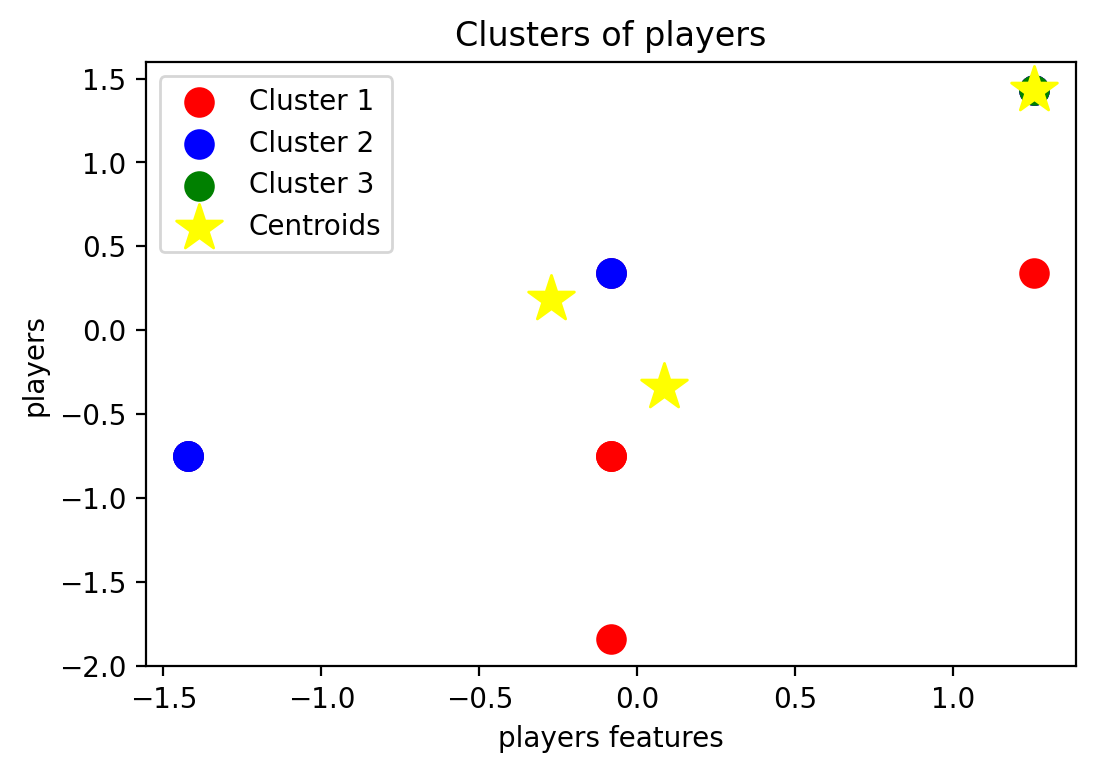

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
pakistan_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,Abid Ali (PAK),2,2,0,43,22,21.50,54,79.62,0,...,-,-,-,-,-,-,-,-,0,0
1,Babar Azam (PAK),3,3,1,221,125,110.50,217,101.84,1,...,-,-,-,-,-,-,-,-,0,0
2,Faheem Ashraf (PAK),2,1,0,23,23,23.00,16,143.75,0,...,87,1,1/30,87.00,5.11,102.0,0,0,0,0
3,Fakhar Zaman (PAK),1,1,0,2,2,2.00,2,100.00,0,...,-,-,-,-,-,-,-,-,0,0
4,Haider Ali (PAK),2,2,0,42,29,21.00,33,127.27,0,...,-,-,-,-,-,-,-,-,1,0
5,Haris Rauf (PAK),2,-,-,-,-,-,-,-,-,...,88,1,1/31,88.00,5.17,102.0,0,0,1,0
6,Haris Sohail (PAK),1,1,0,71,71,71.00,82,86.58,0,...,-,-,-,-,-,-,-,-,0,0
7,Iftikhar Ahmed (PAK),3,3,1,46,18,23.00,59,77.96,0,...,100,5,5/40,20.00,5.00,24.0,0,1,2,0
8,Imad Wasim (PAK),2,1,1,34,34*,-,26,130.76,0,...,92,2,1/43,46.00,6.13,45.0,0,0,0,0
9,Imam-ul-Haq (PAK),3,3,0,111,58,37.00,139,79.85,0,...,-,-,-,-,-,-,-,-,1,0


In [31]:
pakistan_2020["cluster"] = y_kmeans

In [32]:
pakistan_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,Abid Ali (PAK),2,2,0,43,22,21.50,54,79.62,0,...,-,-,-,-,-,-,-,0,0,1
1,Babar Azam (PAK),3,3,1,221,125,110.50,217,101.84,1,...,-,-,-,-,-,-,-,0,0,2
2,Faheem Ashraf (PAK),2,1,0,23,23,23.00,16,143.75,0,...,1,1/30,87.00,5.11,102.0,0,0,0,0,0
3,Fakhar Zaman (PAK),1,1,0,2,2,2.00,2,100.00,0,...,-,-,-,-,-,-,-,0,0,1
4,Haider Ali (PAK),2,2,0,42,29,21.00,33,127.27,0,...,-,-,-,-,-,-,-,1,0,1
5,Haris Rauf (PAK),2,-,-,-,-,-,-,-,-,...,1,1/31,88.00,5.17,102.0,0,0,1,0,0
6,Haris Sohail (PAK),1,1,0,71,71,71.00,82,86.58,0,...,-,-,-,-,-,-,-,0,0,1
7,Iftikhar Ahmed (PAK),3,3,1,46,18,23.00,59,77.96,0,...,5,5/40,20.00,5.00,24.0,0,1,2,0,0
8,Imad Wasim (PAK),2,1,1,34,34*,-,26,130.76,0,...,2,1/43,46.00,6.13,45.0,0,0,0,0,0
9,Imam-ul-Haq (PAK),3,3,0,111,58,37.00,139,79.85,0,...,-,-,-,-,-,-,-,1,0,1


In [33]:
pakistan_2020['cluster'].value_counts()

0    8
1    7
2    1
Name: cluster, dtype: int64

In [34]:
pakistan_Cluster_2020 = np.array([8,7,1])

In [35]:
pakistan_Cluster_2020

array([8, 7, 1])

In [36]:
%store pakistan_Cluster_2020

Stored 'pakistan_Cluster_2020' (ndarray)


In [37]:
pakistan_2020_players_scaled.insert(0, 'Player', pakistan_2020.Player)

In [38]:
pakistan_2020_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,Abid Ali (PAK),-0.083624,0.340997,-0.774597,-0.052715,-0.296126,-0.100731,0.055896,-0.370158,-0.258199,...,-0.699913,-0.920493,-0.789694,-0.721883,-0.956003,-0.730468,-0.258199,-0.480384,-0.921546,0.0
1,Babar Azam (PAK),1.254363,1.432188,1.290994,3.283564,2.979142,2.995326,2.971445,-0.005508,3.872983,...,-0.699913,-0.920493,-0.789694,-0.721883,-0.956003,-0.730468,-0.258199,-0.480384,-0.921546,0.0
2,Faheem Ashraf (PAK),-0.083624,-0.750194,-0.774597,-0.427578,-0.264327,-0.048550,-0.623802,0.682273,-0.258199,...,1.336198,0.841991,-0.303728,2.205180,1.004930,2.302153,-0.258199,-0.480384,-0.921546,0.0
3,Fakhar Zaman (PAK),-1.421611,-0.750194,-0.774597,-0.821184,-0.932100,-0.779080,-0.874217,-0.035704,-0.258199,...,-0.699913,-0.920493,-0.789694,-0.721883,-0.956003,-0.730468,-0.258199,-0.480384,-0.921546,0.0
4,Haider Ali (PAK),-0.083624,0.340997,-0.774597,-0.071458,-0.073535,-0.118124,-0.319727,0.411822,-0.258199,...,-0.699913,-0.920493,-0.789694,-0.721883,-0.956003,-0.730468,-0.258199,-0.480384,0.212664,0.0
5,Haris Rauf (PAK),-0.083624,-1.841385,-0.774597,-0.858670,-0.995697,-0.848654,-0.909991,-1.676795,-0.258199,...,0.318142,0.862250,-0.303728,2.238824,1.027955,2.302153,-0.258199,-0.480384,0.212664,0.0
6,Haris Sohail (PAK),-1.421611,-0.750194,-0.774597,0.472093,1.262012,1.621234,0.556727,-0.255938,-0.258199,...,-0.699913,-0.920493,-0.789694,-0.721883,-0.956003,-0.730468,-0.258199,-0.480384,-0.921546,0.0
7,Iftikhar Ahmed (PAK),1.254363,1.432188,1.290994,0.003514,-0.423320,-0.048550,0.145330,-0.397400,-0.258199,...,1.336198,1.105351,1.640133,-0.048995,0.962719,-0.016910,-0.258199,2.081666,1.346874,0.0
8,Imad Wasim (PAK),-0.083624,-0.750194,1.290994,-0.221403,0.085459,-0.848654,-0.444934,0.469096,-0.258199,...,-0.699913,0.943284,0.182237,0.825760,1.396350,0.607453,-0.258199,-0.480384,-0.921546,0.0
9,Imam-ul-Haq (PAK),1.254363,1.432188,-0.774597,1.221818,0.848628,0.438470,1.576274,-0.366384,-0.258199,...,-0.699913,-0.920493,-0.789694,-0.721883,-0.956003,-0.730468,-0.258199,-0.480384,0.212664,0.0


In [39]:
pakistan_2020_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,Abid Ali (PAK),-0.100731,-0.721883
1,Babar Azam (PAK),2.995326,-0.721883
2,Faheem Ashraf (PAK),-0.048550,2.205180
3,Fakhar Zaman (PAK),-0.779080,-0.721883
4,Haider Ali (PAK),-0.118124,-0.721883
5,Haris Rauf (PAK),-0.848654,2.238824
6,Haris Sohail (PAK),1.621234,-0.721883
7,Iftikhar Ahmed (PAK),-0.048550,-0.048995
8,Imad Wasim (PAK),-0.848654,0.825760
9,Imam-ul-Haq (PAK),0.438470,-0.721883


In [40]:
pakistan_2020_Ave=pakistan_2020_players_scaled.mean()

In [41]:
pakistan_2020_Ave

Mat_x           2.949030e-17
Inns_x         -3.469447e-17
NO             -6.938894e-17
Runs_x          2.081668e-17
HS              7.632783e-17
Ave_x           2.428613e-17
BF              6.938894e-18
SR_x           -7.806256e-18
100             8.326673e-17
50             -4.163336e-17
0               0.000000e+00
4s             -4.857226e-17
6s              2.775558e-17
Unnamed: 0_y    8.326673e-17
Mat_y           2.949030e-17
Inns_y          6.938894e-18
Overs           9.714451e-17
Mdns            7.632783e-17
Runs_y          0.000000e+00
Wkts            2.775558e-17
Ave_y           6.852158e-17
Econ            4.163336e-17
SR_y           -4.315125e-17
4               8.326673e-17
5              -4.857226e-17
Ct             -6.938894e-17
St              0.000000e+00
dtype: float64

In [42]:
pakistan_Ave_2020 =pakistan_2020_Ave[['Ave_x','Ave_y']]

In [43]:
pakistan_Ave_2020

Ave_x    2.428613e-17
Ave_y    6.852158e-17
dtype: float64

In [44]:
pakistan_Ave_2020 = np.array([pakistan_Ave_2020.Ave_x, pakistan_Ave_2020.Ave_y])

In [45]:
pakistan_Ave_2020

array([2.42861287e-17, 6.85215773e-17])

In [46]:
%store pakistan_Ave_2020

Stored 'pakistan_Ave_2020' (ndarray)


In [47]:
pakistan_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,Abid Ali (PAK),2,2,0,43,22,21.50,54,79.62,0,...,-,-,-,-,-,-,-,0,0,1
1,Babar Azam (PAK),3,3,1,221,125,110.50,217,101.84,1,...,-,-,-,-,-,-,-,0,0,2
2,Faheem Ashraf (PAK),2,1,0,23,23,23.00,16,143.75,0,...,1,1/30,87.00,5.11,102.0,0,0,0,0,0
3,Fakhar Zaman (PAK),1,1,0,2,2,2.00,2,100.00,0,...,-,-,-,-,-,-,-,0,0,1
4,Haider Ali (PAK),2,2,0,42,29,21.00,33,127.27,0,...,-,-,-,-,-,-,-,1,0,1
5,Haris Rauf (PAK),2,-,-,-,-,-,-,-,-,...,1,1/31,88.00,5.17,102.0,0,0,1,0,0
6,Haris Sohail (PAK),1,1,0,71,71,71.00,82,86.58,0,...,-,-,-,-,-,-,-,0,0,1
7,Iftikhar Ahmed (PAK),3,3,1,46,18,23.00,59,77.96,0,...,5,5/40,20.00,5.00,24.0,0,1,2,0,0
8,Imad Wasim (PAK),2,1,1,34,34*,-,26,130.76,0,...,2,1/43,46.00,6.13,45.0,0,0,0,0,0
9,Imam-ul-Haq (PAK),3,3,0,111,58,37.00,139,79.85,0,...,-,-,-,-,-,-,-,1,0,1
